In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
data=pd.read_csv(r"C:\Users\KIIT\Desktop\HRC\Buiness DataSet.csv")
df=pd.DataFrame(data)
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200726979,BJ'S in,2019-06-06 00:00:00,2019.0,1.929345e+09,2019-05-20,20190520,20190520,20190604.0,USD,RV,1.0,NaN,13950.27,20190520.0,NAA8,1.929345e+09,0
1,U001,0200769623,WAL-MAR in,2019-04-24 00:00:00,2019.0,1.929142e+09,2019-04-14,20190413,20190414,20190429.0,USD,RV,1.0,NaN,15110.10,20190414.0,NAH4,1.929142e+09,0
2,U001,200769623,WAL-MAR systems,2019-02-26 00:00:00,2019.0,1.928730e+09,2019-02-05,20190203,20190205,20190220.0,USD,RV,1.0,NaN,10998.31,20190205.0,NAH4,1.928730e+09,0
3,U001,0200761734,H E BUT co,2019-05-22 00:00:00,2019.0,1.929287e+09,2019-05-09,20190509,20190509,20190524.0,USD,RV,1.0,NaN,15488.32,20190509.0,NAA8,1.929287e+09,0
4,U001,0200772595,SAFEW,2019-04-04 00:00:00,2019.0,1.928961e+09,2019-03-20,20190314,20190320,20190404.0,USD,RV,1.0,NaN,1031.62,20190320.0,NAA8,1.928961e+09,0


In [7]:
df['baseline_create_date'] = pd.to_datetime(df['baseline_create_date'], format='%Y%m%d')
df = df.sort_values(by="baseline_create_date")

In [8]:
df.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object')

In [9]:
df_temp = pd.read_csv(r"C:\Users\KIIT\Desktop\HRC\Buiness DataSet.csv")
# Creating a temporary copy of the dataset

In [10]:
duplicate = df[df.duplicated()]
duplicate

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen


# Data Preprocessing

In [11]:
# droping completely null columns

count = 0
for col in df.columns:
    if df[col].isnull().sum() == df.shape[0]:
        count += 1
        df.drop(col, axis=1, inplace=True)
        
print("Num columns droped:", count)

print(df.columns, df.shape)

Num columns droped: 1
Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object') (50000, 18)


In [12]:
for i in range(len(df['cust_number'])):
    if "CC" in df['cust_number'][i]:
        df['cust_number'][i]=123
    

<ipython-input-12-feb2a588628a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cust_number'][i]=123


In [13]:
# Remove the constant features
count = 0
unit_col = []
for col in df.columns:
    if df[col].nunique() == 1:
        count += 1
        unit_col.append(col)
df.drop(unit_col, axis=1, inplace=True)

print("Num constant features removed:", count)
print(df.columns, len(df.columns))
df.head(10)

Num constant features removed: 1
Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'total_open_amount', 'baseline_create_date',
       'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object') 17


,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
8181,CA02,0140104429,COSTCO llc,2019-02-20 00:00:00,2019.0,2.960521e+09,2019-01-10,20190110,20190110,20190106.0,CAD,RV,8574.72,2018-12-27,CA10,2.960521e+09,0
10318,U001,0200769623,WAL-MAR,2019-01-09 00:00:00,2019.0,1.928541e+09,2018-12-30,20181229,20181230,20190114.0,USD,RV,56249.14,2018-12-30,NAH4,1.928541e+09,0
40595,U001,0200726979,BJ'S llc,2019-01-15 00:00:00,2019.0,1.928540e+09,2018-12-30,20181229,20181230,20190114.0,USD,RV,137.84,2018-12-30,NAA8,1.928540e+09,0
23364,U001,0200769623,WAL-MAR corporation,2019-01-09 00:00:00,2019.0,1.928541e+09,2018-12-30,20181229,20181230,20190114.0,USD,RV,529.40,2018-12-30,NAH4,1.928541e+09,0
42890,U001,0200762301,C&S WH corporation,2019-01-15 00:00:00,2019.0,1.928540e+09,2018-12-30,20181229,20181230,20190114.0,USD,RV,3211.78,2018-12-30,NAC6,1.928540e+09,0
23372,U001,0200769623,WAL-MAR foundation,2019-01-10 00:00:00,2019.0,1.928543e+09,2018-12-30,20181230,20181230,20190114.0,USD,RV,31888.79,2018-12-30,NAH4,1.928543e+09,0
45017,U001,0200769623,WAL-MAR foundation,2019-01-15 00:00:00,2019.0,1.928540e+09,2018-12-30,20181229,20181230,20190114.0,USD,RV,5154.91,2018-12-30,NAH4,1.928540e+09,0
34568,U001,0200769623,WAL-MAR,2019-01-10 00:00:00,2019.0,1.928543e+09,2018-12-30,20181230,20181230,20190114.0,USD,RV,69358.17,2018-12-30,NAH4,1.928543e+09,0
5220,U001,0200799367,MCL in,2019-01-16 00:00:00,2019.0,1.928540e+09,2018-12-30,20181229,20181230,20190114.0,USD,RV,51909.05,2018-12-30,NAA8,1.928540e+09,0
18895,U001,0200707005,KING S llc,2019-01-14 00:00:00,2019.0,1.928533e+09,2018-12-30,20181229,20181230,20190114.0,USD,RV,17046.59,2018-12-30,NAA8,1.928533e+09,0


In [14]:
df.loc[df.invoice_currency == "CAD", "total_open_amount"]*=0.78
df.head(10)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
8181,CA02,0140104429,COSTCO llc,2019-02-20 00:00:00,2019.0,2.960521e+09,2019-01-10,20190110,20190110,20190106.0,CAD,RV,6688.2816,2018-12-27,CA10,2.960521e+09,0
10318,U001,0200769623,WAL-MAR,2019-01-09 00:00:00,2019.0,1.928541e+09,2018-12-30,20181229,20181230,20190114.0,USD,RV,56249.1400,2018-12-30,NAH4,1.928541e+09,0
40595,U001,0200726979,BJ'S llc,2019-01-15 00:00:00,2019.0,1.928540e+09,2018-12-30,20181229,20181230,20190114.0,USD,RV,137.8400,2018-12-30,NAA8,1.928540e+09,0
23364,U001,0200769623,WAL-MAR corporation,2019-01-09 00:00:00,2019.0,1.928541e+09,2018-12-30,20181229,20181230,20190114.0,USD,RV,529.4000,2018-12-30,NAH4,1.928541e+09,0
42890,U001,0200762301,C&S WH corporation,2019-01-15 00:00:00,2019.0,1.928540e+09,2018-12-30,20181229,20181230,20190114.0,USD,RV,3211.7800,2018-12-30,NAC6,1.928540e+09,0
23372,U001,0200769623,WAL-MAR foundation,2019-01-10 00:00:00,2019.0,1.928543e+09,2018-12-30,20181230,20181230,20190114.0,USD,RV,31888.7900,2018-12-30,NAH4,1.928543e+09,0
45017,U001,0200769623,WAL-MAR foundation,2019-01-15 00:00:00,2019.0,1.928540e+09,2018-12-30,20181229,20181230,20190114.0,USD,RV,5154.9100,2018-12-30,NAH4,1.928540e+09,0
34568,U001,0200769623,WAL-MAR,2019-01-10 00:00:00,2019.0,1.928543e+09,2018-12-30,20181230,20181230,20190114.0,USD,RV,69358.1700,2018-12-30,NAH4,1.928543e+09,0
5220,U001,0200799367,MCL in,2019-01-16 00:00:00,2019.0,1.928540e+09,2018-12-30,20181229,20181230,20190114.0,USD,RV,51909.0500,2018-12-30,NAA8,1.928540e+09,0
18895,U001,0200707005,KING S llc,2019-01-14 00:00:00,2019.0,1.928533e+09,2018-12-30,20181229,20181230,20190114.0,USD,RV,17046.5900,2018-12-30,NAA8,1.928533e+09,0


In [15]:
df.drop("name_customer" ,axis=1, inplace=True)
df.drop("invoice_id" ,axis=1, inplace=True)
df.drop("doc_id" ,axis=1, inplace=True)
df.drop("isOpen" ,axis=1, inplace=True)
df.drop("invoice_currency" ,axis=1, inplace=True)
df.drop("document type" ,axis=1, inplace=True)
df.drop("business_code" ,axis=1, inplace=True)
df.drop("document_create_date" ,axis=1, inplace=True)
df.drop("posting_date" ,axis=1, inplace=True)
df.drop("baseline_create_date" ,axis=1, inplace=True)

In [16]:
"""
- Removing Data where clear_date is NULL and storing it in final_hrc_test_data
"""
final_hrc_test_data = df[df['clear_date'].isnull()]
print(final_hrc_test_data.shape)
df.drop(df[df['clear_date'].isnull()].index, axis=0, inplace=True)
df.shape

(3365, 7)


(46635, 7)

In [17]:
# Finding the columns which have missing data, along with percentage of data missing

miss_columns = {}

for c in df:
    if df[c].isnull().sum() != 0:
        miss_columns[c] = df[c].isnull().mean()
print(miss_columns)

# Checking the miss % in final_hrc_test_data
miss_columns = {}

for c in df:
    if final_hrc_test_data[c].isnull().sum() != 0:
        miss_columns[c] = final_hrc_test_data[c].isnull().mean()
print(miss_columns)

{}
{'clear_date': 1.0}


In [18]:
print(df.columns, df.shape)

Index(['cust_number', 'clear_date', 'buisness_year', 'document_create_date.1',
       'due_in_date', 'total_open_amount', 'cust_payment_terms'],
      dtype='object') (46635, 7)


In [19]:
# Normalizing all date columns
df['document_create_date.1']=pd.to_datetime(df['document_create_date.1'], format='%Y%m%d')
df['due_in_date'] = pd.to_datetime(df['due_in_date'], format='%Y%m%d')
df['clear_date']=pd.to_datetime(df['clear_date'])

In [20]:
df['total_days'] = df['due_in_date']-df['document_create_date.1']
df['total_days'] = pd.to_numeric(df['total_days'].dt.days, downcast='integer')
df['days_past_duedate'] = df['clear_date']-df['due_in_date']
df['days_past_duedate'] = pd.to_numeric(df['days_past_duedate'].dt.days, downcast='integer')
df.head()

,cust_number,clear_date,buisness_year,document_create_date.1,due_in_date,total_open_amount,cust_payment_terms,total_days,days_past_duedate
8181,0140104429,2019-02-20,2019.0,2019-01-10,2019-01-06,6688.2816,CA10,-4,45
10318,0200769623,2019-01-09,2019.0,2018-12-30,2019-01-14,56249.1400,NAH4,15,-5
40595,0200726979,2019-01-15,2019.0,2018-12-30,2019-01-14,137.8400,NAA8,15,1
23364,0200769623,2019-01-09,2019.0,2018-12-30,2019-01-14,529.4000,NAH4,15,-5
42890,0200762301,2019-01-15,2019.0,2018-12-30,2019-01-14,3211.7800,NAC6,15,1


In [21]:
df.drop('due_in_date', axis=1, inplace=True)
df.drop('clear_date', axis=1, inplace=True)

In [22]:
print(df.columns)

Index(['cust_number', 'buisness_year', 'document_create_date.1',
       'total_open_amount', 'cust_payment_terms', 'total_days',
       'days_past_duedate'],
      dtype='object')


### Splitting the data into training and test set

In [23]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(df.drop('days_past_duedate', axis=1),df['days_past_duedate'],test_size=0.20,random_state=2,shuffle=False)

In [24]:
print(train_x.shape, test_x.shape)

(37308, 6) (9327, 6)


### Feature Engineering

In [25]:
train_x.reset_index(inplace=True, drop=True)
test_x.reset_index(inplace=True, drop=True)

In [26]:
train_x

,cust_number,buisness_year,document_create_date.1,total_open_amount,cust_payment_terms,total_days
0,0140104429,2019.0,2019-01-10,6688.2816,CA10,-4
1,0200769623,2019.0,2018-12-30,56249.1400,NAH4,15
2,0200726979,2019.0,2018-12-30,137.8400,NAA8,15
3,0200769623,2019.0,2018-12-30,529.4000,NAH4,15
4,0200762301,2019.0,2018-12-30,3211.7800,NAC6,15
...,...,...,...,...,...,...
37303,0200729290,2019.0,2019-11-17,68260.4600,NAA8,15
37304,0200761734,2019.0,2019-11-17,40381.7200,NAA8,15
37305,0140101682,2019.0,2019-11-17,3457.5000,NAVE,30
37306,0200762301,2019.0,2019-11-17,7946.0300,NAC6,15


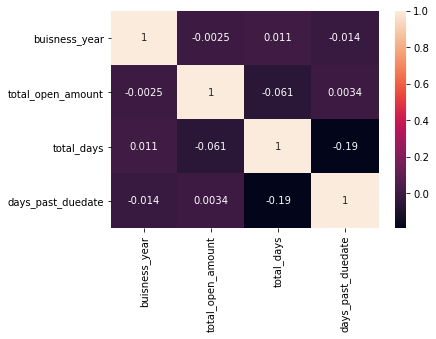

In [27]:
data_corr = df.select_dtypes(include=[np.number])
sns.heatmap(data_corr.corr(), annot=True)

In [28]:
train_x["document_create_date.1"]

0       2019-01-10
1       2018-12-30
2       2018-12-30
3       2018-12-30
4       2018-12-30
           ...    
37303   2019-11-17
37304   2019-11-17
37305   2019-11-17
37306   2019-11-17
37307   2019-11-17
Name: document_create_date.1, Length: 37308, dtype: datetime64[ns]

In [29]:
train_x['doc_create_day'] = train_x["document_create_date.1"].map(lambda x: x.day)
train_x['doc_create_month'] = train_x["document_create_date.1"].map(lambda x: x.month)
train_x['doc_create_year'] = train_x["document_create_date.1"].map(lambda x: x.year)

In [30]:
test_x['doc_create_day'] = test_x["document_create_date.1"].map(lambda x: x.day)
test_x['doc_create_month'] = test_x["document_create_date.1"].map(lambda x: x.month)
test_x['doc_create_year'] = test_x["document_create_date.1"].map(lambda x: x.year)

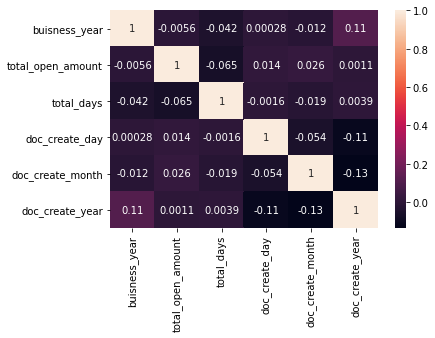

In [31]:
data_corr = train_x.select_dtypes(include=[np.number])
sns.heatmap(data_corr.corr(), annot=True)

In [32]:
"""
- Dropping document_create_date_norm because it has been splitted into its principle componenets
"""

train_x.drop(['document_create_date.1'], axis=1, inplace=True)
test_x.drop(['document_create_date.1'], axis=1, inplace=True)

In [33]:
# Encoding doc create month, daym year and payment terms as well

mapper_year = train_x.groupby('doc_create_year')['total_days'].mean().to_dict()
train_x['doc_create_year_encoded'] = train_x.doc_create_year.map(mapper_year)
test_x['doc_create_year_encoded'] = test_x.doc_create_year.map(mapper_year)

In [34]:
mapper_month = train_x.groupby('doc_create_month')['total_days'].mean().to_dict()
train_x['doc_create_month_encoded'] = train_x.doc_create_month.map(mapper_month)
test_x['doc_create_month_encoded'] = test_x.doc_create_month.map(mapper_month)

In [35]:
mapper_day = train_x.groupby('doc_create_day')['total_days'].mean().to_dict()
train_x['doc_create_day_encoded'] = train_x.doc_create_day.map(mapper_day)
test_x['doc_create_day_encoded'] = test_x.doc_create_day.map(mapper_day)

In [36]:
mapper_pt = train_x.groupby('cust_payment_terms')['total_days'].mean().to_dict()
train_x['cust_payment_terms_encoded'] = train_x.cust_payment_terms.map(mapper_pt)
test_x['cust_payment_terms_encoded'] = test_x.cust_payment_terms.map(mapper_pt)

In [37]:
"""
Making sure none of the values are NULL due to mapping
"""
print(train_x.isnull().sum())
print(test_x.isnull().sum())

cust_number                   0
buisness_year                 0
total_open_amount             0
cust_payment_terms            0
total_days                    0
doc_create_day                0
doc_create_month              0
doc_create_year               0
doc_create_year_encoded       0
doc_create_month_encoded      0
doc_create_day_encoded        0
cust_payment_terms_encoded    0
dtype: int64
cust_number                    0
buisness_year                  0
total_open_amount              0
cust_payment_terms             0
total_days                     0
doc_create_day                 0
doc_create_month               0
doc_create_year                0
doc_create_year_encoded        0
doc_create_month_encoded       0
doc_create_day_encoded         0
cust_payment_terms_encoded    11
dtype: int64


In [38]:
#Replacing the Null value with 0 
test_x.loc[test_x.cust_payment_terms_encoded.isnull()==True, "cust_payment_terms_encoded"]=0

In [39]:
print(test_x.isnull().sum())

cust_number                   0
buisness_year                 0
total_open_amount             0
cust_payment_terms            0
total_days                    0
doc_create_day                0
doc_create_month              0
doc_create_year               0
doc_create_year_encoded       0
doc_create_month_encoded      0
doc_create_day_encoded        0
cust_payment_terms_encoded    0
dtype: int64


In [40]:
"""
- Dropping their original columns, since now we have them in encoded form
"""

train_x.drop("doc_create_day", axis=1, inplace=True)
test_x.drop("doc_create_day", axis=1, inplace=True)
train_x.drop("doc_create_year", axis=1, inplace=True)
test_x.drop("doc_create_year", axis=1, inplace=True)
train_x.drop("doc_create_month", axis=1, inplace=True)
test_x.drop("doc_create_month", axis=1, inplace=True)
train_x.drop("cust_payment_terms", axis=1, inplace=True)
test_x.drop("cust_payment_terms", axis=1, inplace=True)

### Feature Selection

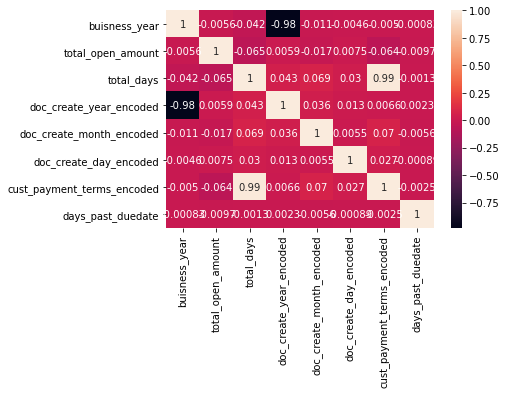

In [41]:
import copy
corr_df = copy.copy(train_x)
corr_df['days_past_duedate'] = train_y

sns.heatmap(corr_df.corr(), annot=True)

In [42]:
test_x

,cust_number,buisness_year,total_open_amount,total_days,doc_create_year_encoded,doc_create_month_encoded,doc_create_day_encoded,cust_payment_terms_encoded
0,0200769623,2019.0,1897.5000,15,17.322268,15.768261,17.872046,15.002782
1,0200769623,2019.0,13234.1900,15,17.322268,15.768261,17.872046,15.002782
2,0200744019,2019.0,10317.2500,15,17.322268,15.768261,17.872046,15.002602
3,0100051641,2019.0,3930.1300,15,17.322268,15.768261,17.872046,15.002602
4,0200792734,2019.0,144064.6600,15,17.322268,15.768261,17.872046,15.002602
...,...,...,...,...,...,...,...,...
9322,0140104429,2020.0,60914.6304,19,-44.500000,18.093895,16.795332,13.171859
9323,0140106408,2020.0,3239.4180,18,-44.500000,18.093895,17.099092,13.171859
9324,0140105847,2020.0,44634.5172,19,-44.500000,18.093895,17.292835,13.171859
9325,0140104429,2020.0,27976.4316,19,-44.500000,18.093895,17.099092,13.171859


### Training

In [43]:

"""
Normalizing the dataset before training on it.
"""

from sklearn.preprocessing import normalize
new_train_x = normalize(train_x)
new_train_x

array([[9.99999999e-01, 1.44106793e-05, 4.77378313e-05, ...,
        1.15448428e-07, 1.24888775e-07, 9.40145792e-08],
       [9.99999961e-01, 1.00563018e-05, 2.80167572e-04, ...,
        7.93266407e-08, 8.42088234e-08, 7.47263518e-08],
       [1.00000000e+00, 1.00584386e-05, 6.86703903e-07, ...,
        7.93434966e-08, 8.42267167e-08, 7.47413326e-08],
       ...,
       [1.00000000e+00, 1.44109619e-05, 2.46785046e-05, ...,
        1.12548689e-07, 1.27564818e-07, 2.14270146e-07],
       [9.99999999e-01, 1.00566689e-05, 3.95792933e-05, ...,
        7.85419401e-08, 8.90209244e-08, 7.47308247e-08],
       [1.00000000e+00, 1.00563022e-05, 2.23709141e-06, ...,
        7.85390758e-08, 8.90176779e-08, 7.47263547e-08]])

In [44]:
# Trying out random forest to check the important features
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import RidgeCV, LassoCV, LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA

### Random Forest

In [45]:
rgr = RandomForestRegressor(n_estimators=100, random_state=1)
rgr.verbose = 1
rgr.fit(new_train_x, train_y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   20.6s finished


RandomForestRegressor(random_state=1, verbose=1)

In [46]:
rgr.score(new_train_x, train_y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.2s finished


0.4932159871208136

In [47]:
pred = rgr.predict(test_x)
print(pred)
print(mean_squared_error(test_y, pred))

[56.91166667 56.91166667 56.91166667 ... 33.28766667 33.28766667
 33.28766667]
1985.2804181147685


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


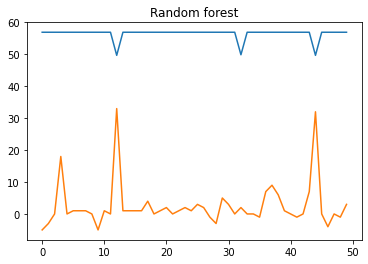

In [48]:
plt.title("Random forest")
plt.plot(range(len(pred))[:50],pred[:50])
plt.plot(range(len(pred))[:50],test_y[:50])
plt.show()

### Adaptive Boosting

In [49]:
# DecisionTreeRegressor mentioned explicitly to remove the max_depth=3 contraint.

ada = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), loss='square', random_state=1, n_estimators=100)
ada.fit(new_train_x, train_y)
ada.score(new_train_x, train_y)

-7.191922797267361

In [50]:
pred = ada.predict(test_x)
print(pred)
print(mean_squared_error(test_y, pred))

[91. 91. 91. ... 91. 91. 91.]
8305.433415139902


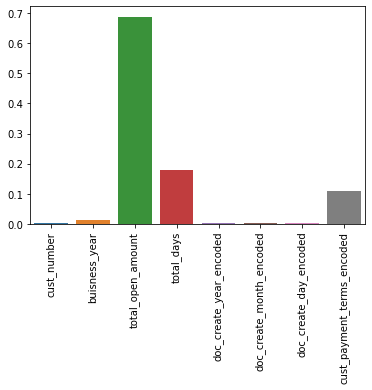

In [51]:
"""
- Plotting the relative importance of each feature according to AdaBoost.
"""

plt.xticks(rotation=90)
sns.barplot(train_x.columns, ada.feature_importances_)
plt.show()

### Stacked Generalization

In [52]:
estimators = [('ridge', RidgeCV()),
              ('lasso', LassoCV(random_state=1)),
              ('svr', SVR(C=1, gamma=1e-6))]

In [53]:
reg = StackingRegressor(estimators=estimators, final_estimator=GradientBoostingRegressor(random_state=1))

In [54]:
pca = PCA(n_components=5)
pca.fit(new_train_x)

PCA(n_components=5)

In [55]:
pca.explained_variance_ratio_

array([9.47304375e-01, 5.15332280e-02, 1.15806061e-03, 4.32434567e-06,
       8.81126456e-09])

In [ ]:
reg.fit(new_train_x, train_y)
print(reg.score(new_train_x, train_y))

In [ ]:
pred = reg.predict(test_x)
print(pred)
print(mean_squared_error(test_y, pred))

In [ ]:
lr = LinearRegression()
lr.fit(new_train_x, train_y)
print(lr.score(new_train_x, train_y))
pred = lr.predict(test_x)
print(mean_squared_error(test_y, pred))

In [ ]:
final_model = rgr

### On the HRC Test set

In [ ]:
train_x.columns

In [ ]:
final_hrc_test_data.columns

In [ ]:
final_hrc_test_data['document_create_date.1']=pd.to_datetime(final_hrc_test_data['document_create_date.1'], format='%Y%m%d')
final_hrc_test_data['due_in_date'] = pd.to_datetime(final_hrc_test_data['due_in_date'], format='%Y%m%d')
final_hrc_test_data['clear_date']=pd.to_datetime(final_hrc_test_data['clear_date'])

In [ ]:
final_hrc_test_data

In [ ]:
final_hrc_test_data['total_days']=final_hrc_test_data['due_in_date']-final_hrc_test_data['document_create_date.1']
final_hrc_test_data['total_days'] = final_hrc_test_data['total_days'].dt.days.astype('int16')

In [ ]:
final_hrc_test_data['total_days']

In [ ]:
final_hrc_test_data['document_create_date.1'] = pd.to_datetime(final_hrc_test_data['document_create_date.1'])
final_hrc_test_data['doc_create_day'] = final_hrc_test_data['document_create_date.1'].map(lambda x: x.day)
final_hrc_test_data['doc_create_month'] = final_hrc_test_data['document_create_date.1'].map(lambda x: x.month)
final_hrc_test_data['doc_create_year'] = final_hrc_test_data['document_create_date.1'].map(lambda x: x.year)
final_hrc_test_data.drop('document_create_date.1', axis=1, inplace=True)

In [ ]:
final_hrc_test_data.columns

In [ ]:
mapper_month = final_hrc_test_data.groupby('doc_create_month')['total_days'].mean().to_dict()
final_hrc_test_data['doc_create_month_encoded'] = final_hrc_test_data.doc_create_month.map(mapper_month)

In [ ]:
mapper_year = final_hrc_test_data.groupby('doc_create_year')['total_days'].mean().to_dict()
final_hrc_test_data['doc_create_year_encoded'] = final_hrc_test_data.doc_create_year.map(mapper_year)

In [ ]:
mapper_day = final_hrc_test_data.groupby('doc_create_day')['total_days'].mean().to_dict()
final_hrc_test_data['doc_create_day_encoded'] = final_hrc_test_data.doc_create_day.map(mapper_day)

In [ ]:
mapper_pt = final_hrc_test_data.groupby('cust_payment_terms')['total_days'].mean().to_dict()
final_hrc_test_data['cust_payment_terms_encoded'] = final_hrc_test_data.cust_payment_terms.map(mapper_pt)

In [ ]:
final_hrc_test_data
due_in_date=final_hrc_test_data['due_in_date']

In [ ]:
#Removing the unwanted columns from the final test se
cols_to_remove = list(set(final_hrc_test_data.columns) - set(train_x.columns))

In [ ]:
final_test = final_hrc_test_data.drop(cols_to_remove, axis=1)

In [ ]:
# final test_data to predict on
final_test.columns

In [ ]:
final_test['days_past_duedate'] = final_model.predict(final_test)

In [ ]:
final_test